In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%store -r df_2
%store -r y_train_mc
%store -r X_val_mc
%store -r y_val_mc
%store -r metric_features
%store -r non_metric_features

In [3]:
X_train = df_2
y_train = y_train_mc
X_val = X_val_mc
y_val = y_val_mc
metric_features = metric_features
non_metric_features = non_metric_features

In [4]:
X_train_combined = pd.concat([X_train, y_train], axis=1)


In [5]:
#X_train_combined

In [6]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot(x='primary_diagnosis', hue='readmitted_multiclass', data=X_train_combined)
# plt.show()


In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot(x='secondary_diagnosis', hue='readmitted_multiclass', data=X_train_combined)
# plt.show()

In [8]:
# import pandas as pd

# summary_stats = X_train_combined.groupby(['primary_diagnosis', 'readmitted_multiclass'])['readmitted_multiclass'].count().unstack()

# print(summary_stats)


In [9]:
categorical = X_train.select_dtypes(include=['category','bool','object']).columns
categorical

Index(['is_male', 'has_insurance', 'admission_type', 'medical_specialty',
       'healthy_heartrate', 'discharged_home', 'admission_source',
       'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'metformin', 'insulin',
       'prescribed_diabetes_meds', 'is_inpatient', 'race_AfricanAmerican',
       'race_Caucasian', 'race_Hispanic', 'race_Other'],
      dtype='object')

In [10]:
numerical = X_train.select_dtypes(exclude=['category', 'bool', 'object']).columns
numerical

Index(['age', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'number_diagnoses', 'num_medication', 'total_visits_previous_year',
       'total_tests', 'visit_count'],
      dtype='object')

C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\1332782426.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_combined.loc[X_train_combined[target_variable] == 0, feature], color='grey', fill=True, ax=axes[row, col], label='Not Readmitted')
C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\1332782426.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_combined.loc[X_train_combined[target_variable] == 1, feature], color='#B7CE45', fill=True, ax=axes[row, col], label='<30 days')
C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\1332782426.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_combined.loc[X_train_combined[target_variable] == 2, feature], color='blue', fill=True, ax

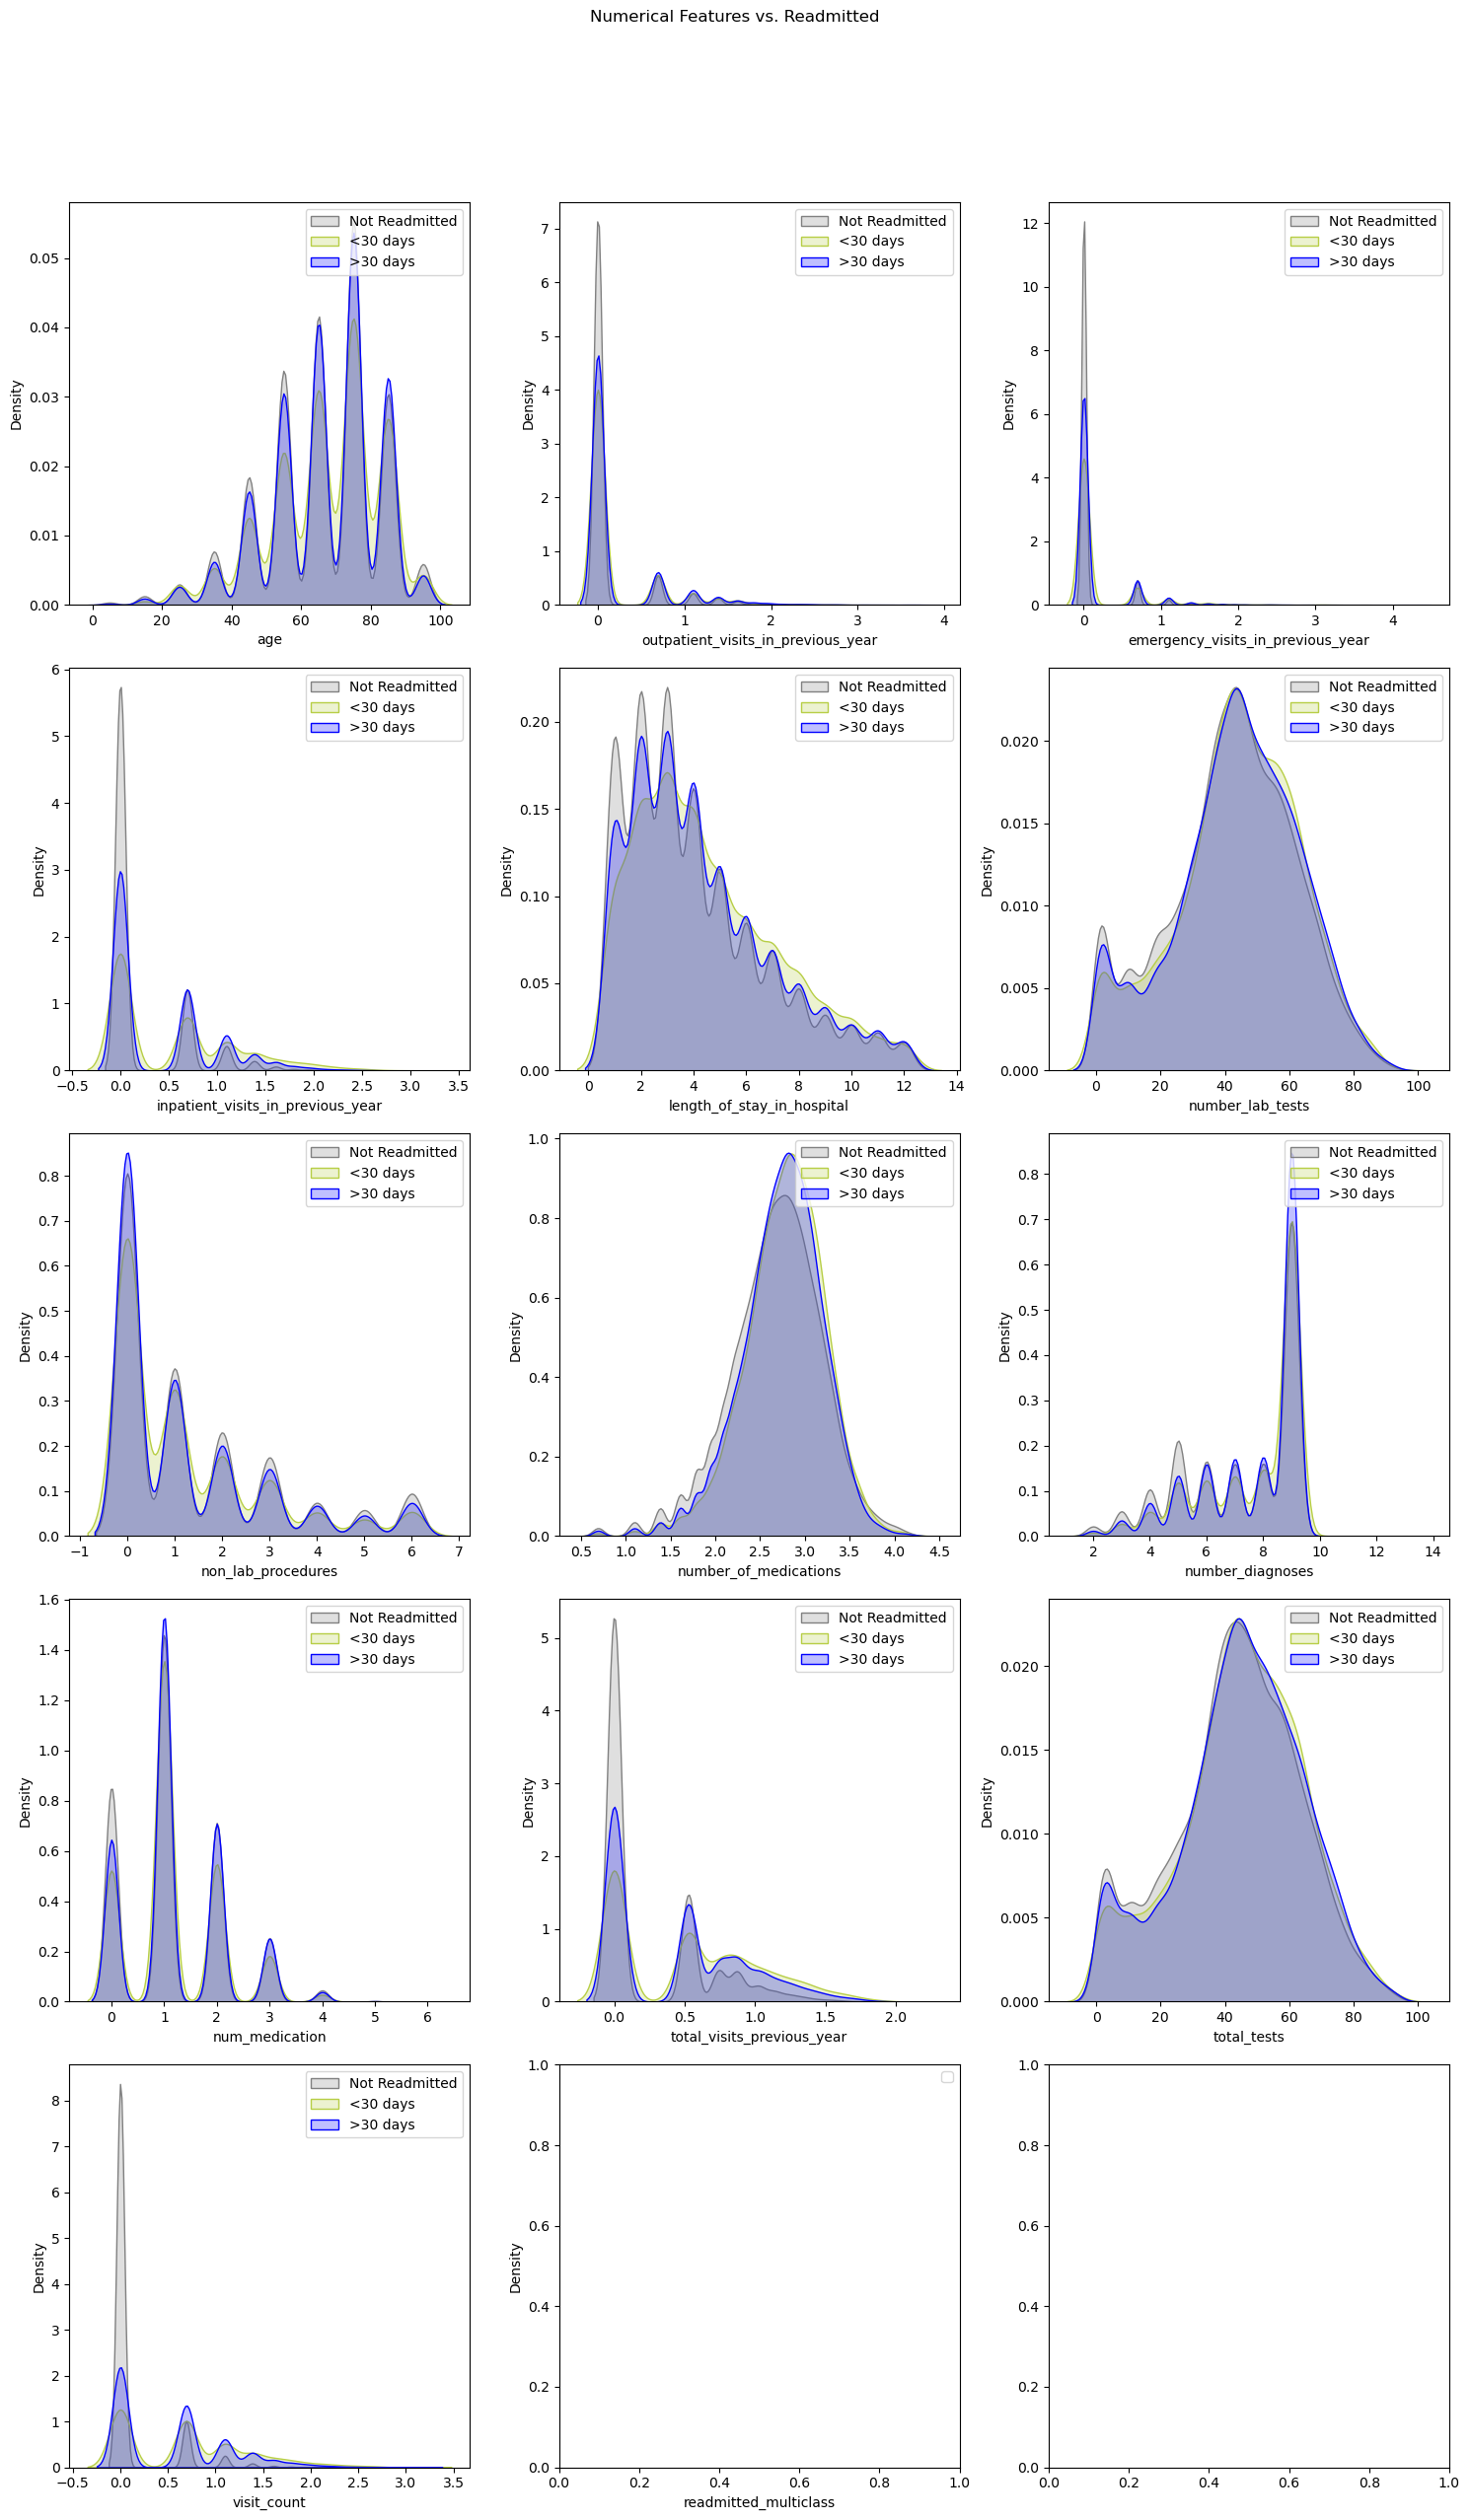

In [11]:
numerical_features = X_train_combined.select_dtypes(include='number')

target_variable = 'readmitted_multiclass'


num_cols = 3  
num_rows = (len(numerical_features.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle(f'Numerical Features vs. Readmitted', y=1.02)


for i, feature in enumerate(numerical_features.columns):
    row = i // num_cols
    col = i % num_cols
    
    # Plot KDE for each class
    sns.kdeplot(X_train_combined.loc[X_train_combined[target_variable] == 0, feature], color='grey', fill=True, ax=axes[row, col], label='Not Readmitted')
    sns.kdeplot(X_train_combined.loc[X_train_combined[target_variable] == 1, feature], color='#B7CE45', fill=True, ax=axes[row, col], label='<30 days')
    sns.kdeplot(X_train_combined.loc[X_train_combined[target_variable] == 2, feature], color='blue', fill=True, ax=axes[row, col], label='>30 days')
    
    axes[row, col].set(xlabel=feature, ylabel='Density')
    axes[row, col].legend()

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Analisando os gráficos, as variáveis que parecem ser mais relevantes são:
- length_of_stay_in_hospital
- inpatient_visits_in_previous_year

Pois as distribuições para cada um dos valores do target estão bem separadas e não estão sobrepostas - Indica uma possivel correlação com o target

Possivelmente, dropar number_of_medications e number_of_lab_tests pois estão praticamente sobrespostos totalmente um no outro

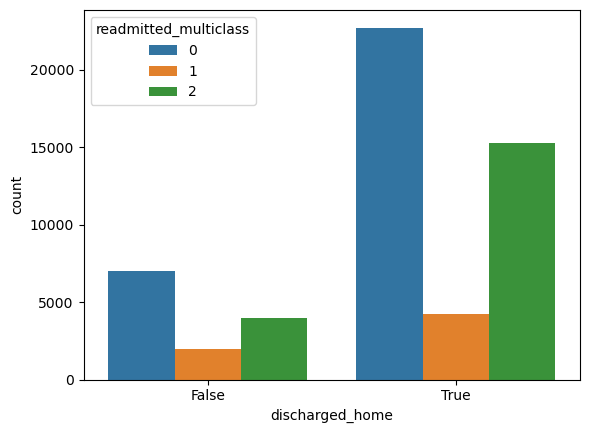

In [12]:
sns.countplot(x='discharged_home', hue='readmitted_multiclass', data=X_train_combined)
plt.show()

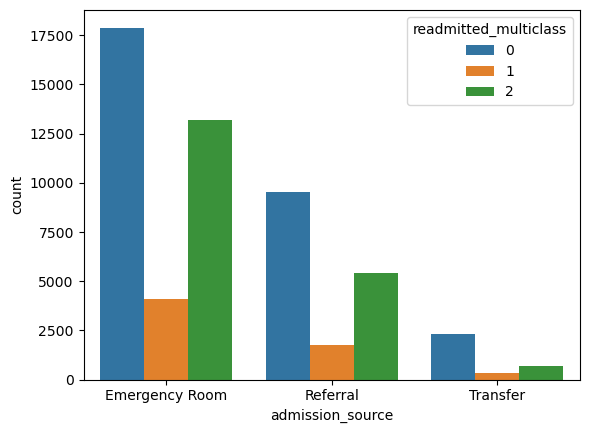

In [13]:
sns.countplot(x='admission_source', hue='readmitted_multiclass', data=X_train_combined)
plt.show()


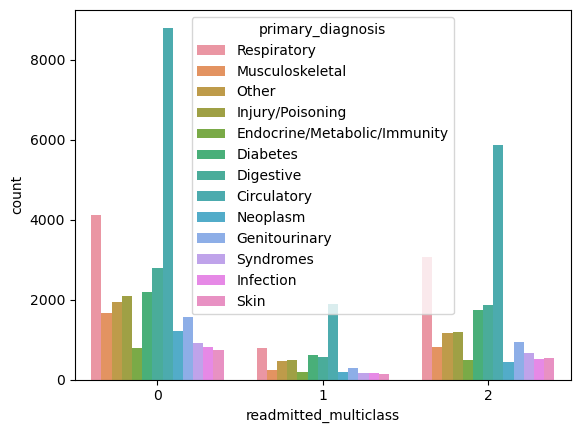

In [14]:
sns.countplot(x='readmitted_multiclass', hue='primary_diagnosis', data=X_train_combined)
plt.show()


# *numerical features*

## outpatient/inpatient/emergency_visits_in_previous_year

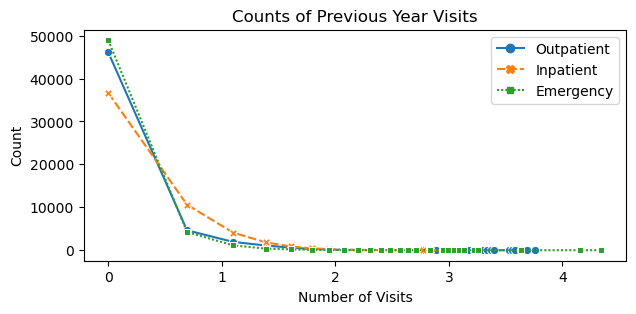

In [15]:
outpatient_counts = X_train['outpatient_visits_in_previous_year'].value_counts()
inpatient_counts = X_train['inpatient_visits_in_previous_year'].value_counts()
emergency_counts = X_train['emergency_visits_in_previous_year'].value_counts()

counts_df = pd.DataFrame({
    'Outpatient': outpatient_counts,
    'Inpatient': inpatient_counts,
    'Emergency': emergency_counts
})

plt.figure(figsize=(7, 3))
sns.lineplot(data=counts_df, markers=True)
plt.title('Counts of Previous Year Visits')
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.show()

C:\Anaconda\envs\DM2324\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


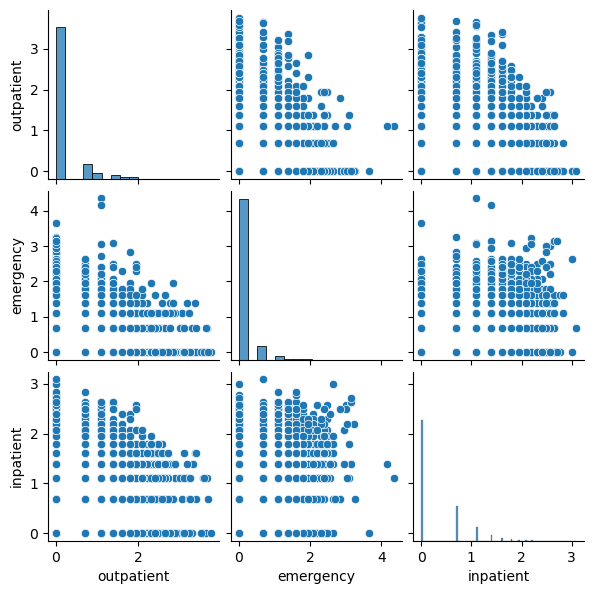

In [16]:
cols = df_2.copy()

cols.rename(columns={
    'outpatient_visits_in_previous_year': 'outpatient',
    'emergency_visits_in_previous_year': 'emergency',
    'inpatient_visits_in_previous_year': 'inpatient'
}, inplace=True)

sns.pairplot(cols[['outpatient', 'emergency', 'inpatient']], height=2, aspect=1)
plt.show()



# numerical and non-numerical features

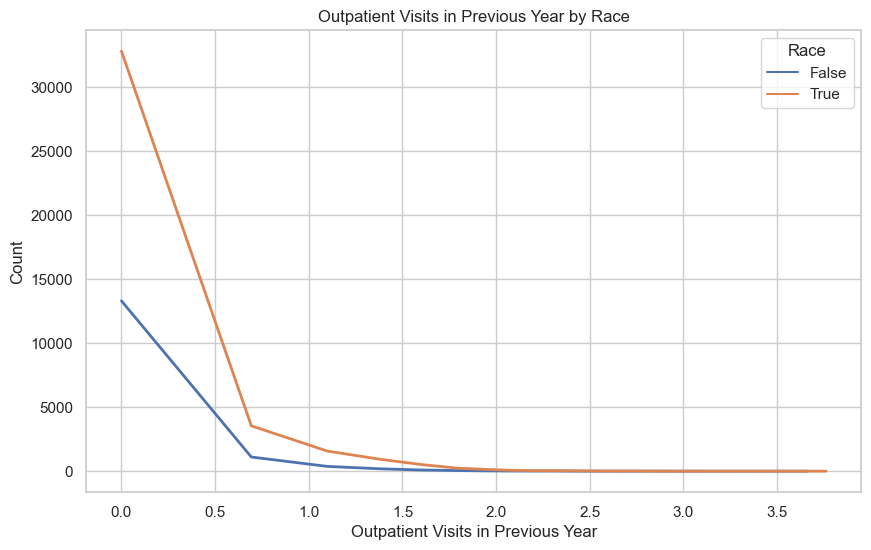

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Group by 'race' and count occurrences of each 'outpatient_visits_in_previous_year'
counts = X_train.groupby(['race_Caucasian', 'outpatient_visits_in_previous_year']).size().reset_index(name='count')

sns.lineplot(x='outpatient_visits_in_previous_year', y='count', hue='race_Caucasian', data=counts, lw=2)

plt.title('Outpatient Visits in Previous Year by Race')
plt.xlabel('Outpatient Visits in Previous Year')
plt.ylabel('Count')
plt.legend(title='Race', loc='upper right')
plt.show()

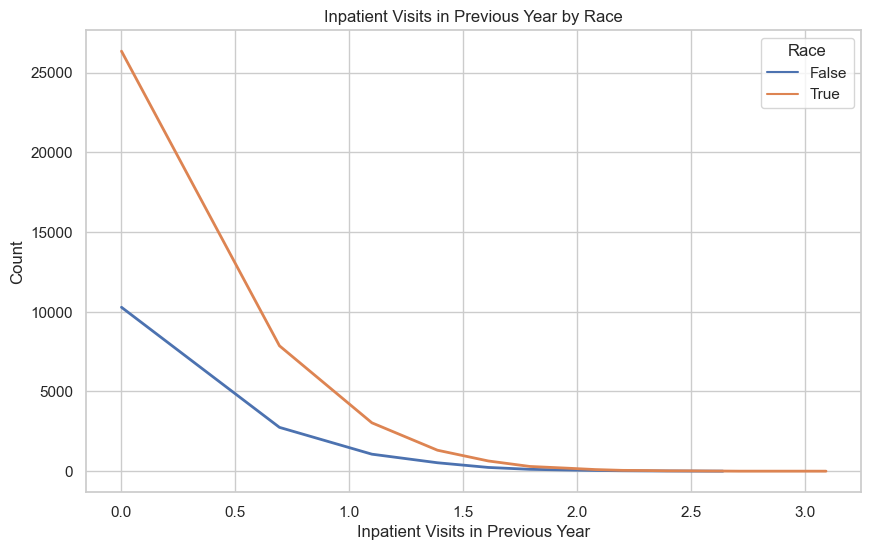

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Group by 'race' and count occurrences of each 'outpatient_visits_in_previous_year'
counts = X_train.groupby(['race_Caucasian', 'inpatient_visits_in_previous_year']).size().reset_index(name='count')

sns.lineplot(x='inpatient_visits_in_previous_year', y='count', hue='race_Caucasian', data=counts, lw=2)

plt.title('Inpatient Visits in Previous Year by Race')
plt.xlabel('Inpatient Visits in Previous Year')
plt.ylabel('Count')
plt.legend(title='Race', loc='upper right')
plt.show()

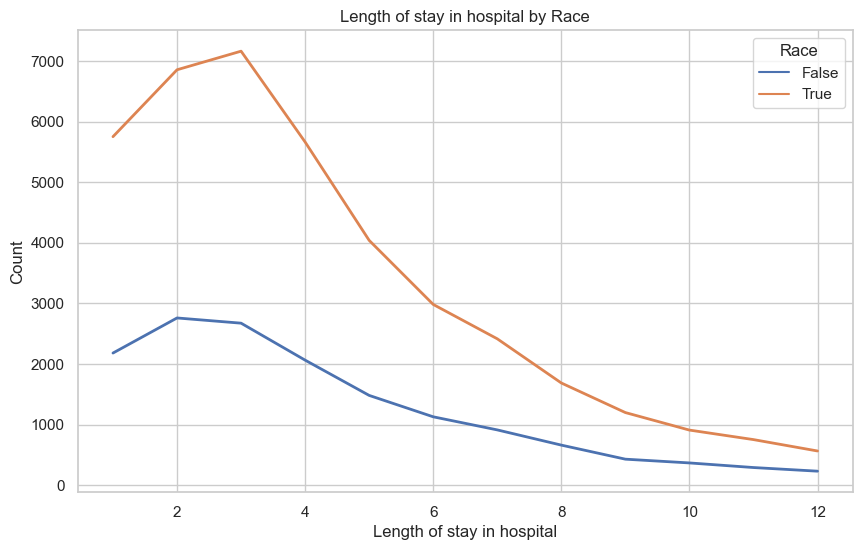

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Group by 'race' and count occurrences of each 'outpatient_visits_in_previous_year'
counts = X_train.groupby(['race_Caucasian', 'length_of_stay_in_hospital']).size().reset_index(name='count')

sns.lineplot(x='length_of_stay_in_hospital', y='count', hue='race_Caucasian', data=counts, lw=2)

plt.title('Length of stay in hospital by Race')
plt.xlabel('Length of stay in hospital')
plt.ylabel('Count')
plt.legend(title='Race', loc='upper right')
plt.show()

## correlation matrix

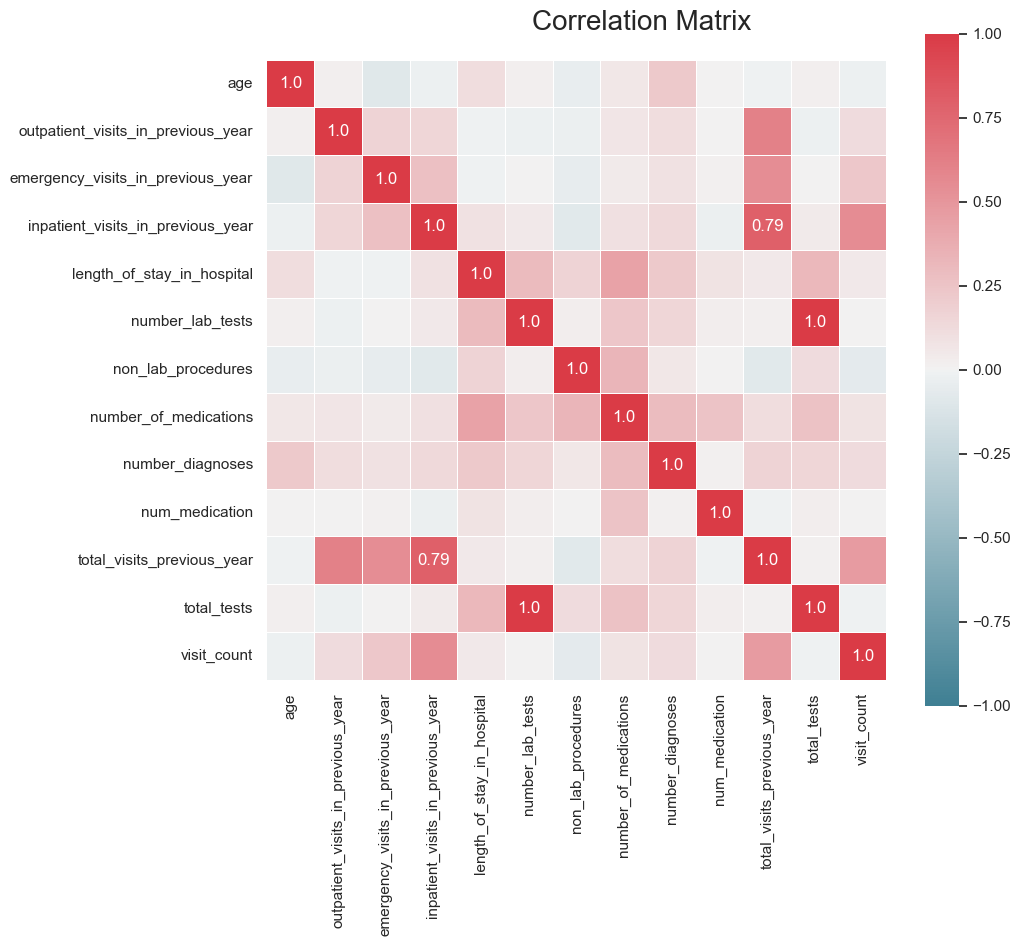

In [20]:
fig = plt.figure(figsize=(10, 8))

corr = np.round(X_train[numerical].corr(method="pearson"), decimals=2)

# Annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.65
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

# *non-numerical features* 

In [21]:
def bar_charts_categorical(df_2, feature, target):
    cont_tab = pd.crosstab(df_2[feature], df_2[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

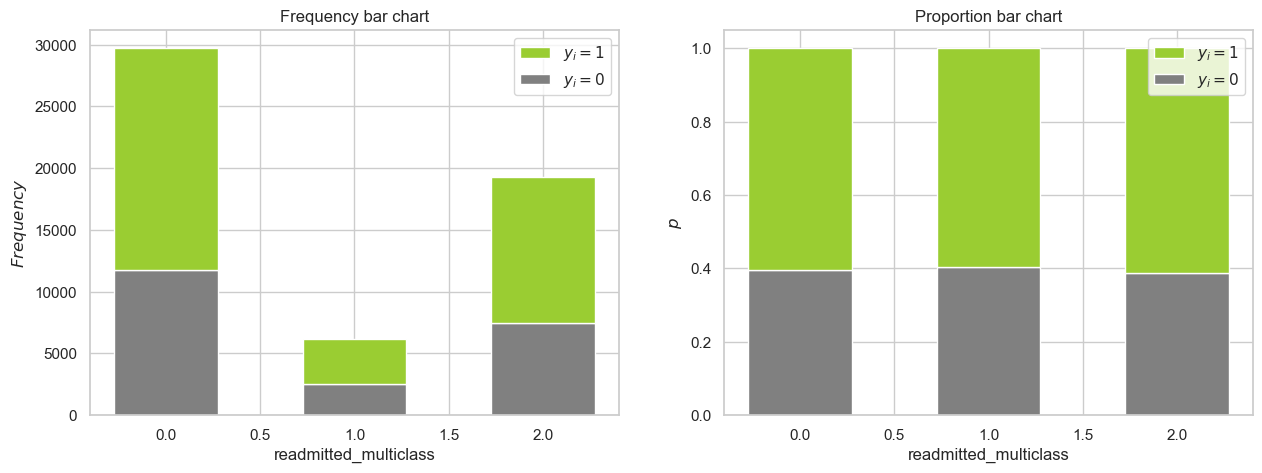

In [22]:
bar_charts_categorical(X_train_combined, 'readmitted_multiclass', 'has_insurance')

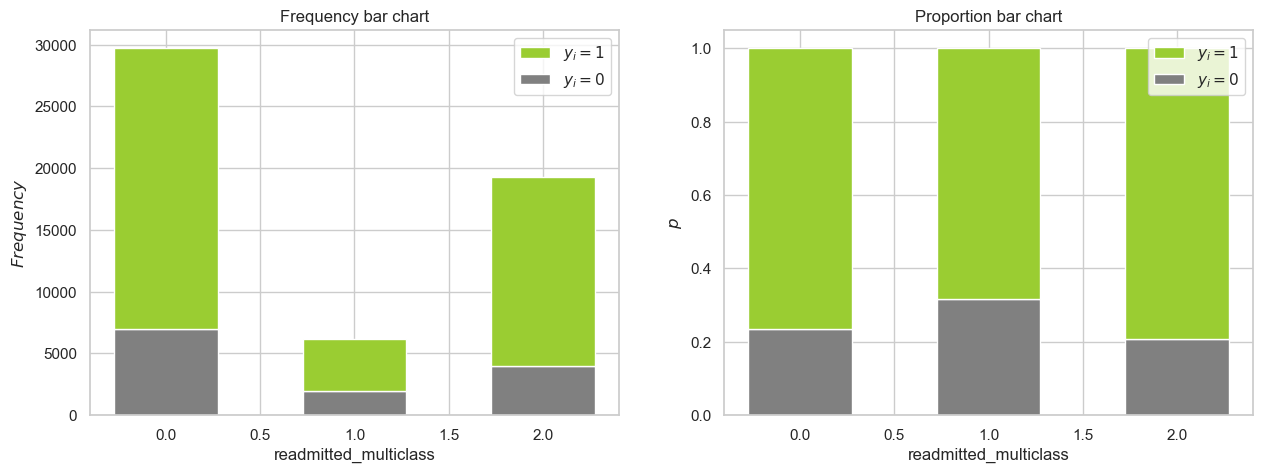

In [23]:
bar_charts_categorical(X_train_combined, 'readmitted_multiclass', 'discharged_home')

C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\2239811725.py:16: RuntimeWarning: invalid value encountered in divide
  obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values),
C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\2239811725.py:17: RuntimeWarning: divide by zero encountered in divide
  np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])


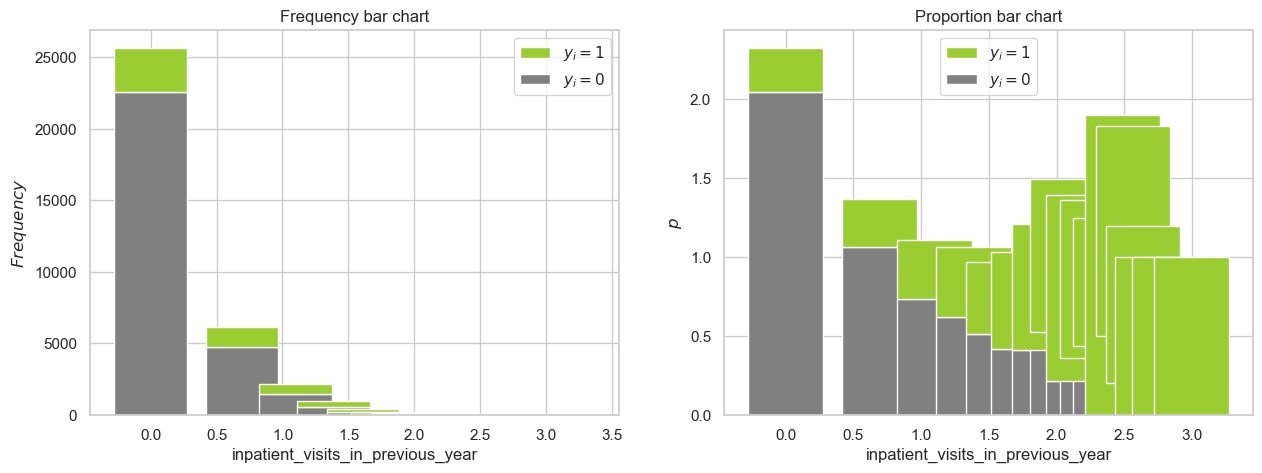

In [24]:
bar_charts_categorical(X_train_combined, 'inpatient_visits_in_previous_year', 'readmitted_multiclass')

C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\2239811725.py:16: RuntimeWarning: divide by zero encountered in divide
  obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values),
C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\2239811725.py:16: RuntimeWarning: invalid value encountered in divide
  obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values),
C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\2239811725.py:17: RuntimeWarning: divide by zero encountered in divide
  np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_33172\2239811725.py:17: RuntimeWarning: invalid value encountered in divide
  np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
C:\Anaconda\envs\DM2324\Lib\site-packages\matplotlib\transforms.py:2050: RuntimeWarning: invalid value encountered in double_scalars
  self.

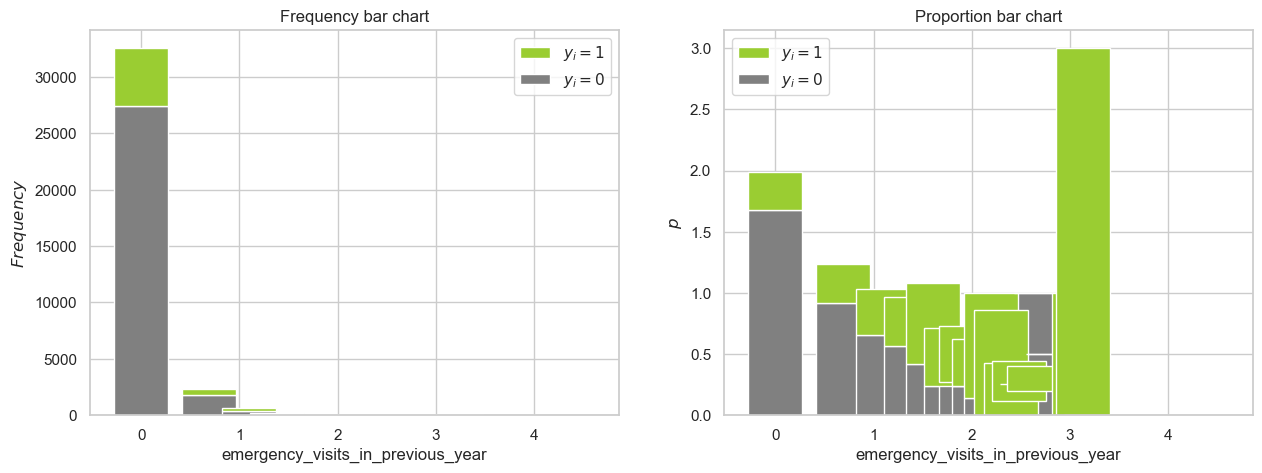

In [25]:
bar_charts_categorical(X_train_combined, 'emergency_visits_in_previous_year', 'readmitted_multiclass')

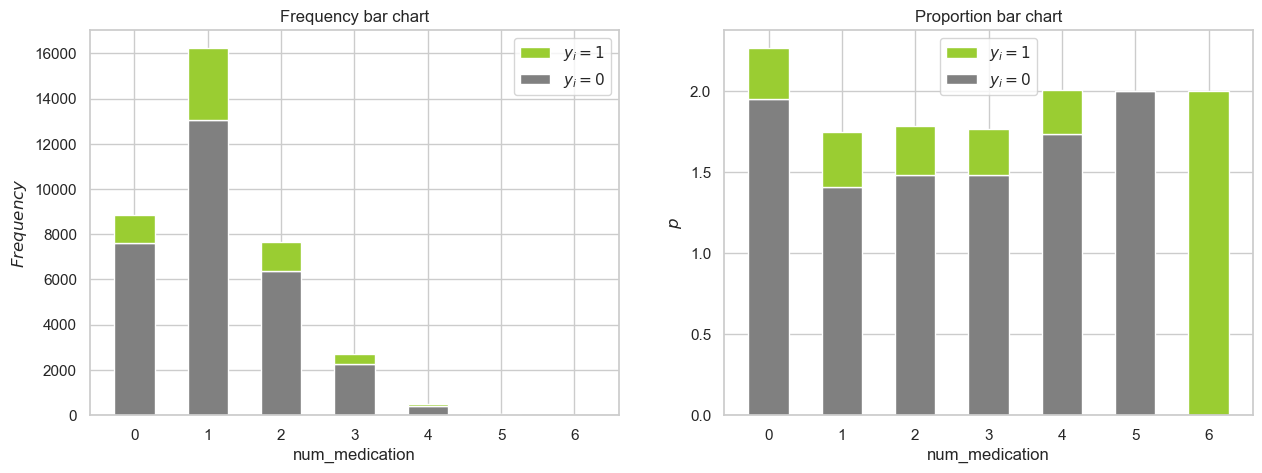

In [26]:
bar_charts_categorical(X_train_combined, 'num_medication', 'readmitted_multiclass')

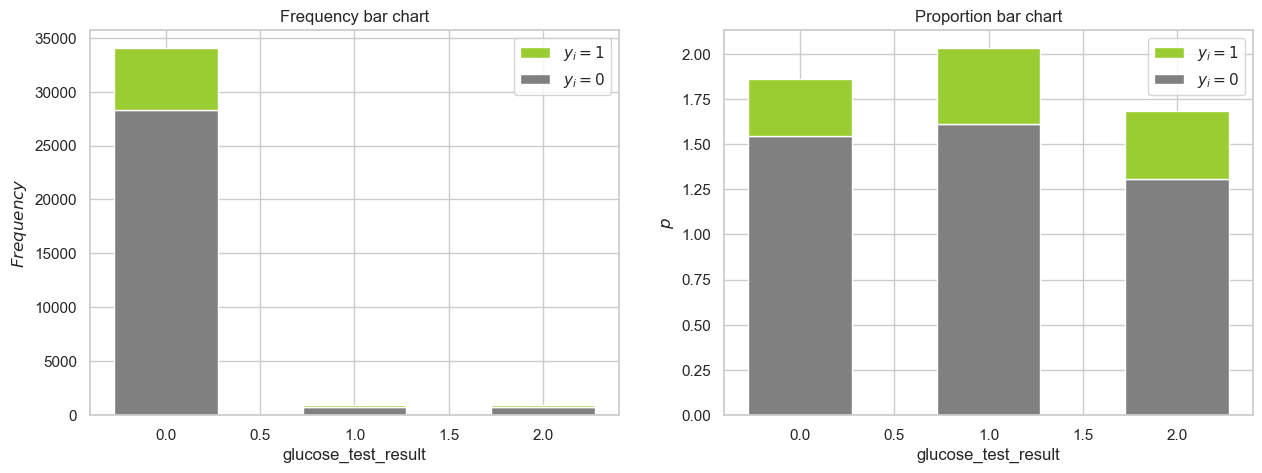

In [27]:
bar_charts_categorical(X_train_combined, 'glucose_test_result', 'readmitted_multiclass')

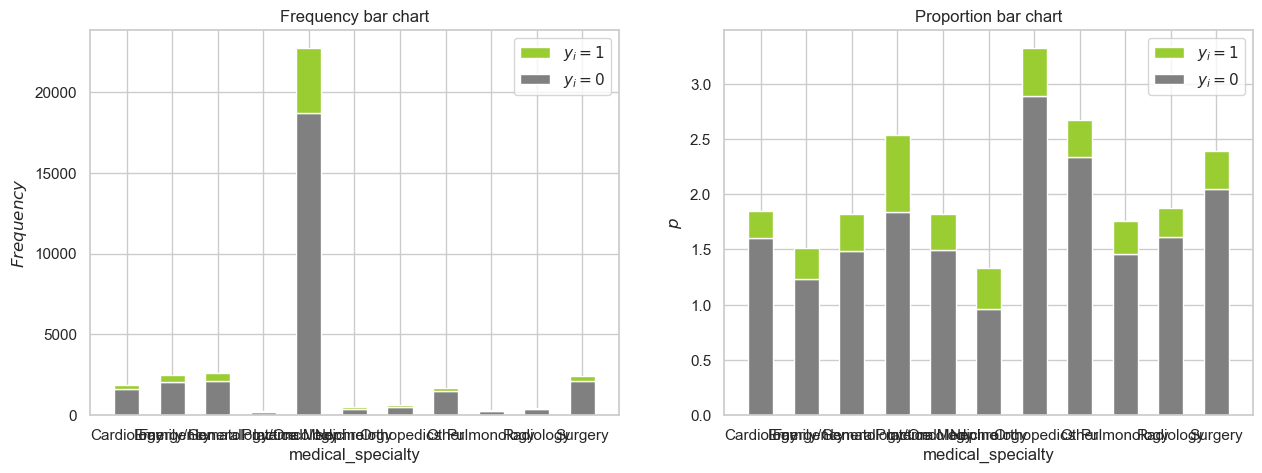

In [28]:
bar_charts_categorical(X_train_combined, 'medical_specialty', 'readmitted_multiclass')


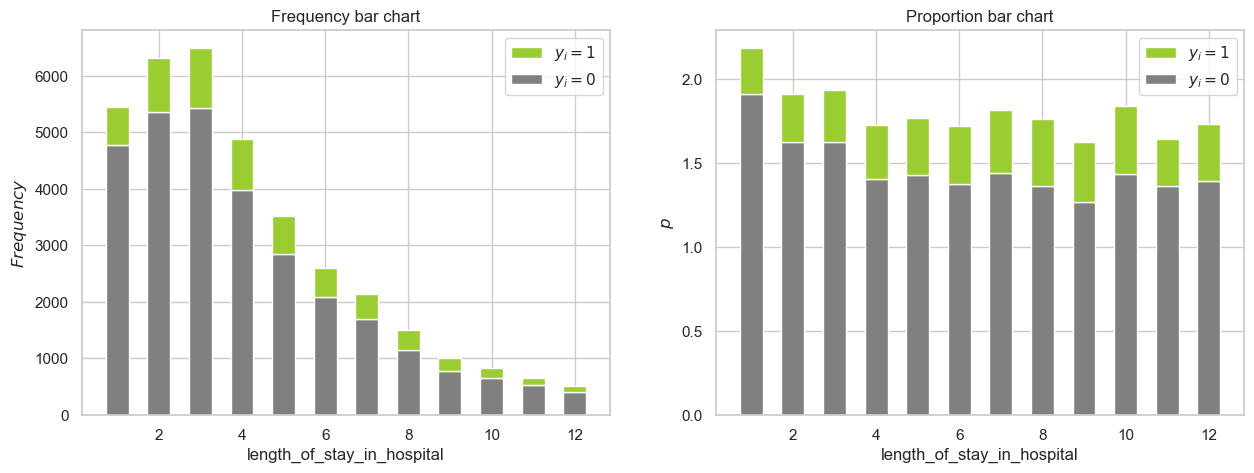

In [29]:
bar_charts_categorical(X_train_combined, 'length_of_stay_in_hospital', 'readmitted_multiclass')

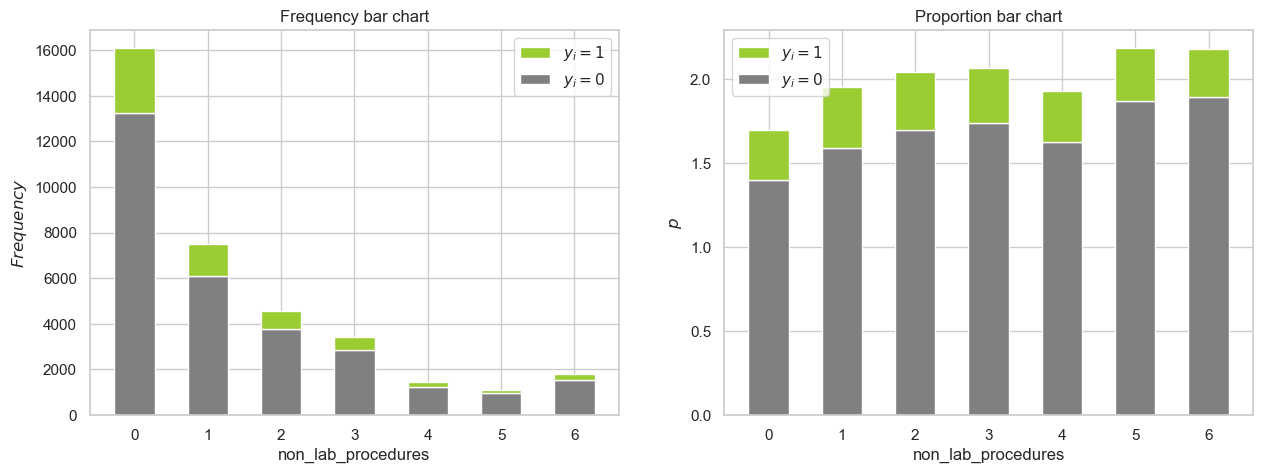

In [30]:
bar_charts_categorical(X_train_combined, 'non_lab_procedures', 'readmitted_multiclass')

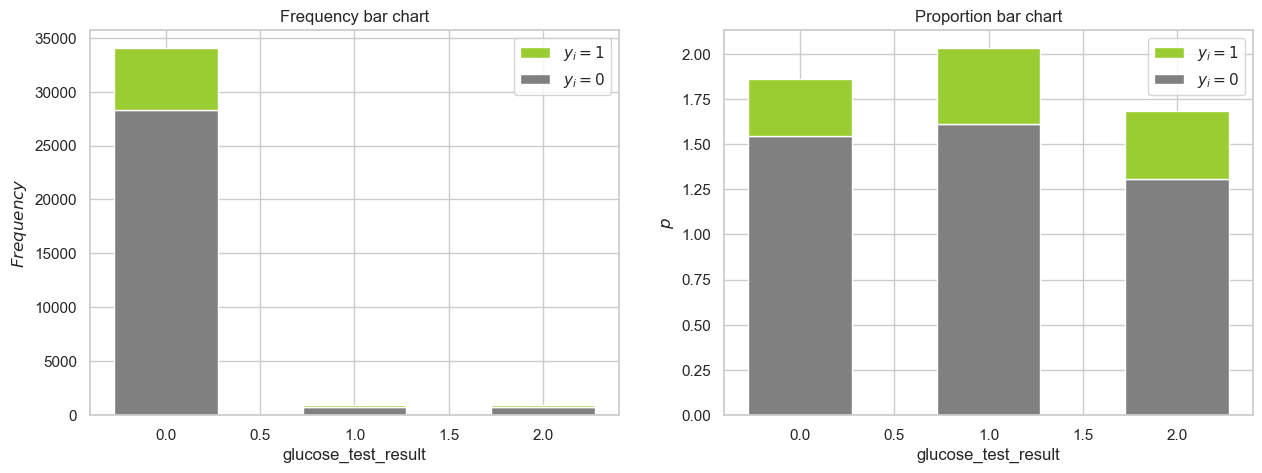

In [31]:
bar_charts_categorical(X_train_combined, 'glucose_test_result', 'readmitted_multiclass')

In [32]:
X_train_combined.columns

Index(['is_male', 'age', 'has_insurance', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'healthy_heartrate', 'discharged_home',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'num_medication', 'metformin',
       'insulin', 'prescribed_diabetes_meds', 'total_visits_previous_year',
       'total_tests', 'is_inpatient', 'race_AfricanAmerican', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'visit_count', 'readmitted_multiclass'],
      dtype='object')

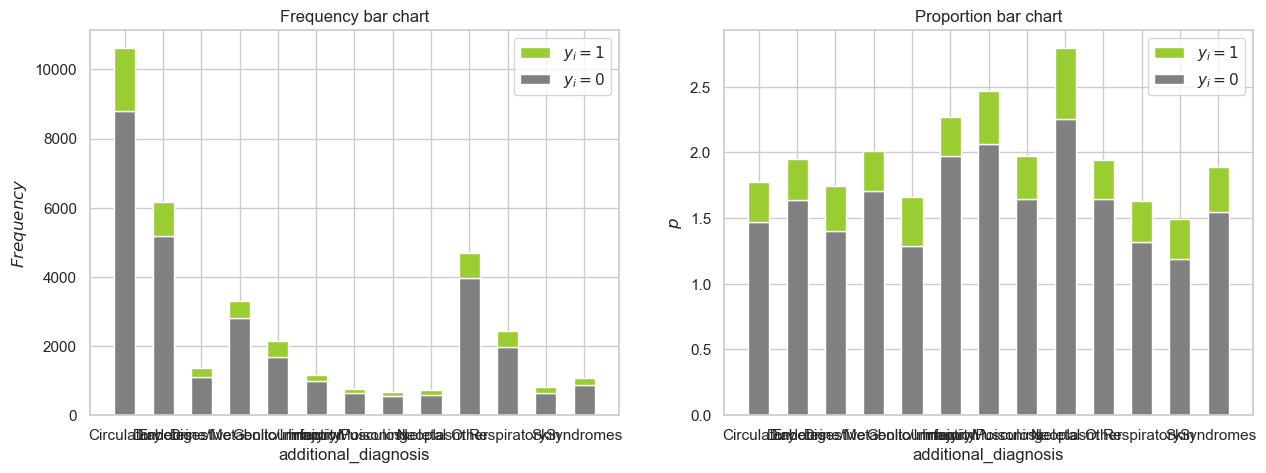

In [33]:
bar_charts_categorical(X_train_combined, 'additional_diagnosis', 'readmitted_multiclass')